In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Author  : S.Inoue
# Date    : 07/05/2022
# Updated : 05/17/2023

In [3]:
cd /data_st02/drug/inoue/CGBVS

/data_st02/drug/inoue/CGBVS


### config

In [4]:
dataset_name = "kinase_chembl"

In [6]:
dataset_dir = f"data/dataset/{dataset_name}"

### data_load

In [5]:
# multimodal_data_index
data_index = pd.read_csv(f"{dataset_dir}/multimodal_data_index.csv", header=None)
data_index = data_index.set_axis(['mol_id', 'seq_id', 'mol_smiles', 'seq_name'], axis='columns')
data_index['seq_name'] = [i.split('/')[-1] for i in data_index['seq_name']]
print(len(data_index))
data_index.head(5)

487694


,mol_id,seq_id,mol_smiles,seq_name
0,0,46,COc1ccc2c(c1)c(/C=C1\C(=O)Nc3ccc(S(N)(=O)=O)cc...,CDK1_HUMAN
1,0,130,COc1ccc2c(c1)c(/C=C1\C(=O)Nc3ccc(S(N)(=O)=O)cc...,HUNK_HUMAN
2,0,189,COc1ccc2c(c1)c(/C=C1\C(=O)Nc3ccc(S(N)(=O)=O)cc...,KSYK_HUMAN
3,0,325,COc1ccc2c(c1)c(/C=C1\C(=O)Nc3ccc(S(N)(=O)=O)cc...,RON_HUMAN
4,1,169,CCCCCCCCCCCCCCOC(=O)C[C@@]1(CCO)COC(=O)C1,KPCA_HUMAN


In [7]:
# summary
data_summary = pd.read_csv(f"{dataset_dir}/{dataset_name}.summary.csv", header=0)
data_summary = data_summary.set_axis(['seq_id', 'count', 'count_pos', 'count_neg'], axis='columns')
data_summary["ratio_neg"] = [data_summary["count_neg"][i] / data_summary["count"][i] for i in range(len(data_summary))]
print(len(data_summary))
data_summary.head(5)

391


,seq_id,count,count_pos,count_neg,ratio_neg
0,0,83,83,0,0.000000
1,1,1031,1028,3,0.002910
2,2,159,159,0,0.000000
3,3,2210,2128,82,0.037104
4,4,232,205,27,0.116379


In [6]:
data_index[["seq_id", "seq_name"]].drop_duplicates()

,seq_id,seq_name
0,186,KSYK_HUMAN
1,166,KPCA_HUMAN
2,141,JAK2_HUMAN
3,56,CHK1_HUMAN
4,383,WEE1_HUMAN
...,...,...
97571,16,ANPRA_HUMAN
109903,17,ARAF_HUMAN
109945,133,ILK_HUMAN
110013,316,RIPK3_HUMAN


In [9]:
# merge seq_name
data_seq = pd.merge(data_index[["seq_id", "seq_name"]].drop_duplicates(), data_summary, on="seq_id", how='right')
data_seq.head(5)

,seq_id,seq_name,count,count_pos,count_neg,ratio_neg
0,0,AAK1_HUMAN,83,83,0,0.000000
1,1,AAPK1_HUMAN,1031,1028,3,0.002910
2,2,AAPK2_HUMAN,159,159,0,0.000000
3,3,ABL1_HUMAN,2210,2128,82,0.037104
4,4,ABL2_HUMAN,232,205,27,0.116379


In [19]:
data_seq.sort_values("ratio_neg").head(5)

,seq_id,seq_name,count,count_pos,count_neg,ratio_neg
0,0,AAK1_HUMAN,83,83,0,0.0
256,256,MRCKA_HUMAN,842,842,0,0.0
339,339,SRPK2_HUMAN,79,79,0,0.0
338,338,SRPK1_HUMAN,676,676,0,0.0
337,337,SRMS_HUMAN,532,532,0,0.0


In [18]:
data_seq.sort_values("ratio_neg").tail(5)

,seq_id,seq_name,count,count_pos,count_neg,ratio_neg
171,171,KPCD1_HUMAN,551,442,109,0.197822
147,147,KAPCB_HUMAN,593,460,133,0.224283
152,152,KC1E_HUMAN,153,113,40,0.261438
148,148,KAPCG_HUMAN,514,379,135,0.262646
45,45,CDK19_HUMAN,276,121,155,0.561594


In [10]:
seqlist_sort_countneg_over100 = data_seq[(data_seq["count_neg"] >= 100) & (data_seq["count_pos"] >= 100)].sort_values("count", ascending=False)
seqlist_sort_countneg_over100.to_csv(f"data/dataset/{dataset_name}/seqlist_sort_countneg_over100.csv")
print(len(seqlist_sort_countneg_over100))
seqlist_sort_countneg_over100.head(5)

# save seq_list
with open(f'data/dataset/{dataset_name}/seqlist_visualize_countneg_over100.txt', "w") as o:
    for row in list(seqlist_sort_countneg_over100['seq_name']):
        print(row, sep="\n", file=o)

27


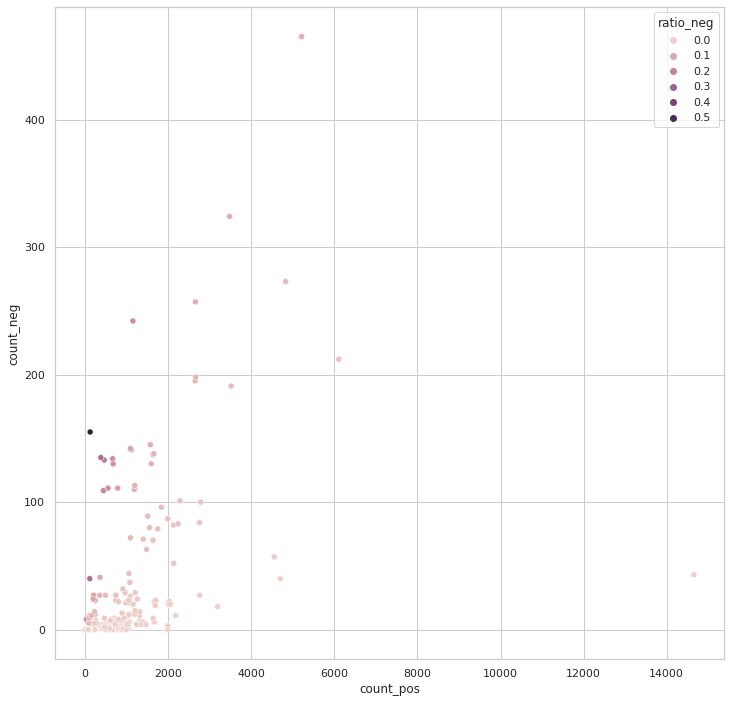

In [11]:
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Pastel1')
fig, ax = plt.subplots(1, 1, figsize=(12,12))
sns.scatterplot(data=data_seq, x='count_pos', y='count_neg', hue='ratio_neg', ax=ax)
plt.savefig(f"data/dataset/{dataset_name}/fig_sort_datacount.png")
#plt.show()

In [12]:
seqlist_sort_rationeg_over10per = data_seq[data_seq["ratio_neg"] >= 0.1].sort_values("ratio_neg", ascending=False)
seqlist_sort_rationeg_over10per.to_csv(f"data/dataset/{dataset_name}/seqlist_sort_rationeg_over10per.csv")
print(len(seqlist_sort_rationeg_over10per))
seqlist_sort_rationeg_over10per.head(5)

# save seq_list
with open(f'data/dataset/{dataset_name}/seqlist_visualize_rationeg_over10per.txt', "w") as o:
    for row in list(seqlist_sort_rationeg_over10per['seq_name']):
        print(row, sep="\n", file=o)

17


In [13]:
seqlist_sort_rationeg_over10per

,seq_id,seq_name,count,count_pos,count_neg,ratio_neg
45,45,CDK19_HUMAN,276,121,155,0.561594
148,148,KAPCG_HUMAN,514,379,135,0.262646
152,152,KC1E_HUMAN,153,113,40,0.261438
147,147,KAPCB_HUMAN,593,460,133,0.224283
171,171,KPCD1_HUMAN,551,442,109,0.197822
202,202,M3K14_HUMAN,41,33,8,0.195122
169,169,KPCA_HUMAN,1393,1151,242,0.173726
170,170,KPCB_HUMAN,797,663,134,0.168130
178,178,KPCL_HUMAN,665,554,111,0.166917
175,175,KPCE_HUMAN,806,676,130,0.161290


In [20]:
seqlist_sort_countneg_over100

,seq_id,seq_name,count,count_pos,count_neg,ratio_neg
385,385,VGFR2_HUMAN,6320,6108,212,0.033544
87,87,EGFR_HUMAN,5677,5212,465,0.081909
47,47,CDK2_HUMAN,5100,4827,273,0.053529
336,336,SRC_HUMAN,3800,3476,324,0.085263
123,123,GSK3B_HUMAN,3707,3516,191,0.051524
46,46,CDK1_HUMAN,2912,2655,257,0.088255
21,21,AURKA_HUMAN,2881,2781,100,0.034710
192,192,LCK_HUMAN,2861,2663,198,0.069207
50,50,CDK5_HUMAN,2844,2649,195,0.068565
101,101,ERBB2_HUMAN,2385,2284,101,0.042348
